In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6  # меняем размер графиков по умолчанию

plt.figure(figsize = (14, 14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

# Читаем файлы

In [2]:
TEST_FILE_PATH = 'realestatepriceprediction/test.csv'
TRAIN_FILE_PATH = 'realestatepriceprediction/train.csv'
SS_FILE_PATH = 'realestatepriceprediction/sample_submission.csv'

About this Competition
File descriptions

    train.csv - the training set
    test.csv - the test set
    sampleSubmission.csv - a sample submission file in the correct format

Data fields

    Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
    Rooms - количество комнат
    Square - площадь
    LifeSquare - жилая площадь
    KitchenSquare - площадь кухни
    Floor - этаж
    HouseFloor - количество этажей в доме
    HouseYear - год постройки дома
    Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    Social_1, Social_2, Social_3 - социальные показатели местности
    Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    Price - цена квартиры 

In [3]:
test_data = pd.read_csv(TEST_FILE_PATH)
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [4]:
train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


# Подготовка данных

In [5]:
train_data.info()
train_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [6]:
test_data.info()
test_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


Id

In [7]:
train_data_id = train_data['Id']
train_data = train_data.drop(['Id'], axis=1)

test_data_id = test_data['Id']
test_data = test_data.drop(['Id'], axis=1)

Square

56.31577519793556

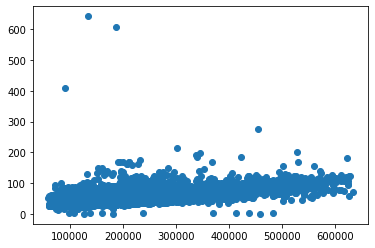

In [8]:
plt.scatter(train_data['Price'], train_data['Square'])
train_data['Square'].mean()

Ищем несоответствие отношений площади к жилой площади

In [9]:
train_data.loc[train_data['Square'] > train_data['LifeSquare']][['Square', 'LifeSquare']].shape

(7405, 2)

In [10]:
train_data.loc[train_data['Square'] < train_data['LifeSquare']][['Square', 'LifeSquare']].shape

(482, 2)

In [11]:
s_train = train_data.loc[train_data['Square'] > train_data['LifeSquare']]['Square'].mean(axis=0)
l_train = train_data.loc[train_data['Square'] > train_data['LifeSquare']]['LifeSquare'].mean(axis=0)
k_train = l_train/s_train

s_test = test_data.loc[test_data['Square'] > test_data['LifeSquare']]['Square'].mean(axis=0)
l_test = test_data.loc[test_data['Square'] > test_data['LifeSquare']]['LifeSquare'].mean(axis=0)
k_test = l_test/s_test

In [12]:
train_data.loc[(train_data['Square'] < train_data['LifeSquare']), 'Square'] = train_data.loc[(train_data['Square'] < train_data['LifeSquare']), 'LifeSquare']

test_data.loc[(test_data['Square'] < test_data['LifeSquare']), 'Square'] = test_data.loc[(test_data['Square'] < test_data['LifeSquare']), 'LifeSquare']

In [13]:
train_data.loc[train_data['Square'] == train_data['LifeSquare'], 'LifeSquare'] = train_data.loc[train_data['Square'] == train_data['LifeSquare'], 'Square'] * k_train

test_data.loc[test_data['Square'] == test_data['LifeSquare'], 'LifeSquare'] = test_data.loc[test_data['Square'] == test_data['LifeSquare'], 'Square'] * k_test

Убираем выбросы

In [14]:
train_data.loc[train_data['Square'] > 250][:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,23,2.0,263.542020,165.639334,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1982,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4328,27,3.0,7480.592129,4701.642264,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,102,1.0,410.639749,258.092029,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,85,3.0,461.463614,290.035440,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [15]:
train_data.drop(train_data.loc[train_data['Square'] > 250][:].index, inplace=True)

In [16]:
train_data.loc[train_data['Square'] < 10][:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1316,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,6,1.0,4.604943,2.894262,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3413,5,1.0,5.549458,3.487901,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,27,3.0,5.610772,3.526438,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,1,1.0,4.525736,2.844479,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8283,34,1.0,2.642219,1.660666,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
9294,45,1.0,5.257278,3.304263,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
9613,38,1.0,4.618547,2.902812,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083


In [17]:
train_data.drop(train_data.loc[train_data['Square'] < 10][:].index, inplace=True)

56.29580977842499

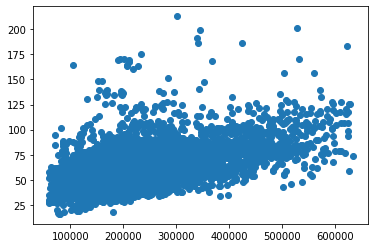

In [18]:
plt.scatter(train_data['Price'], train_data['Square'])
train_data['Square'].mean()

LifeSquare - жилая площадь

34.7045751766009

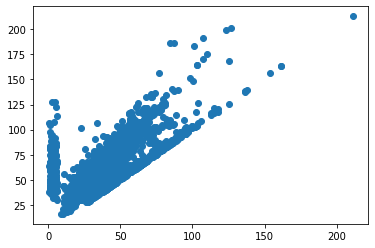

In [19]:
plt.scatter(train_data['LifeSquare'], train_data['Square'])
train_data['LifeSquare'].mean()

Заполняем пропуски

In [20]:
LifeSquareProrportions = (train_data.loc[train_data['LifeSquare'].notnull(), 'LifeSquare'] / train_data.loc[train_data['LifeSquare'].notnull(), 'Square']).mean() 

train_data.loc[train_data['LifeSquare'].isnull(), 'LifeSquare'] = train_data.loc[train_data['LifeSquare'].isnull(), 'Square'] * LifeSquareProrportions

test_data.loc[test_data['LifeSquare'].isnull(), 'LifeSquare'] = test_data.loc[test_data['LifeSquare'].isnull(), 'Square'] * LifeSquareProrportions

Корректируем данные

In [21]:
train_data.loc[train_data['LifeSquare'] < 10][:].shape

(196, 19)

In [22]:
train_data.loc[train_data['LifeSquare'] < 10, 'LifeSquare'] = train_data.loc[train_data['LifeSquare'] < 10, 'Square'] * LifeSquareProrportions

test_data.loc[test_data['LifeSquare'] < 10, 'LifeSquare'] = test_data.loc[test_data['LifeSquare'] < 10, 'Square'] * LifeSquareProrportions

35.948699849903335

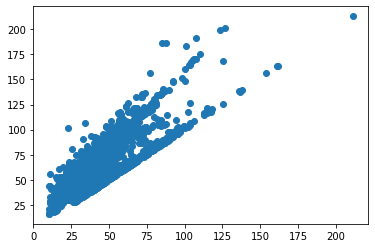

In [23]:
plt.scatter(train_data['LifeSquare'], train_data['Square'])
train_data['LifeSquare'].mean()

KitchenSquare - площадь кухни

6.276241987179487

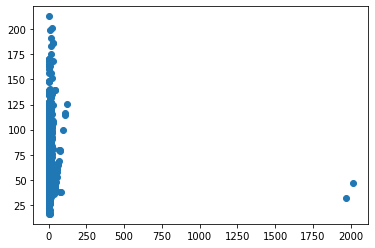

In [24]:
plt.scatter(train_data['KitchenSquare'], train_data['Square'])
train_data['KitchenSquare'].mean()

In [25]:
train_data.loc[train_data['KitchenSquare'] > train_data['Square']][:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [26]:
train_data.loc[train_data['KitchenSquare'] > train_data['Square'], 'KitchenSquare'] = 6

test_data.loc[test_data['KitchenSquare'] > test_data['Square'], 'KitchenSquare'] = 6

In [27]:
train_data.loc[train_data['KitchenSquare'] == 0, 'KitchenSquare'] = train_data.loc[train_data['KitchenSquare'] == 0, 'Square'] - train_data.loc[train_data['KitchenSquare'] == 0, 'LifeSquare']

test_data.loc[test_data['KitchenSquare'] == 0, 'KitchenSquare'] = test_data.loc[test_data['KitchenSquare'] == 0, 'Square'] - test_data.loc[test_data['KitchenSquare'] == 0, 'LifeSquare']

In [28]:
train_data.loc[train_data['KitchenSquare'] < 5][:].shape

(2617, 19)

In [29]:
train_data.loc[train_data['KitchenSquare'] < 5, 'KitchenSquare'] = 6

test_data.loc[test_data['KitchenSquare'] < 5, 'KitchenSquare'] = 6

8.51196136228616

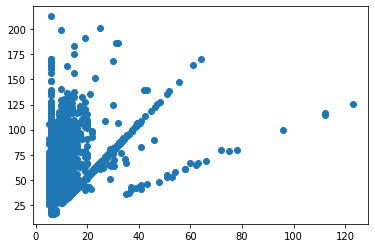

In [30]:
plt.scatter(train_data['KitchenSquare'], train_data['Square'])
train_data['KitchenSquare'].mean()

Rooms

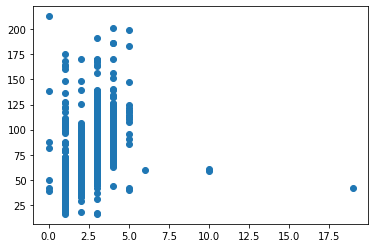

In [31]:
plt.scatter(train_data['Rooms'], train_data['Square'])

In [32]:
train_data['Rooms'].value_counts()

2.0     3877
1.0     3697
3.0     2232
4.0      150
5.0       17
0.0        7
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [33]:
train_data.loc[train_data['Rooms'] > 5, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [34]:
train_data.drop(train_data.loc[train_data['Rooms'] > 5][:].index, inplace=True)

In [35]:
train_data.loc[train_data['Rooms'] == 0, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,27,0.0,138.427694,136.215499,6.000000,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,27,0.0,212.932361,211.231125,6.000000,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,27,0.0,41.790881,26.035198,15.755684,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,28,0.0,49.483501,30.827604,18.655897,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,6,0.0,81.491446,50.768154,30.723292,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
6149,88,0.0,38.697117,19.345131,9.000000,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,27,0.0,87.762616,85.125471,6.000000,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [36]:
train_data.drop(train_data.loc[train_data['Rooms'] == 0, :].index, inplace=True)

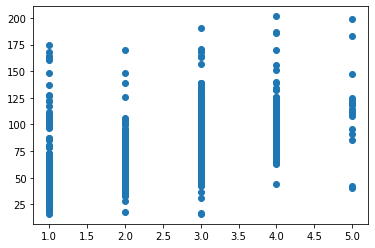

In [37]:
plt.scatter(train_data['Rooms'], train_data['Square'])

Floor - этаж

HouseFloor - количество этажей в доме

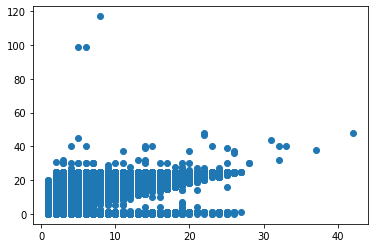

In [38]:
plt.scatter(train_data['Floor'], train_data['HouseFloor'])

In [39]:
train_data.loc[train_data['Floor'] > train_data['HouseFloor']][:].shape

(1812, 19)

In [40]:
train_data.loc[(train_data['HouseFloor']==0), 'HouseFloor'] = train_data.loc[(train_data['HouseFloor']==0), 'Floor']

test_data.loc[(test_data['HouseFloor']==0), 'HouseFloor'] = test_data.loc[(test_data['HouseFloor']==0), 'Floor']

In [41]:
train_data.loc[(train_data['HouseFloor'] < train_data['Floor']), 'HouseFloor'] = train_data.loc[(train_data['HouseFloor'] < train_data['Floor']), 'Floor']

test_data.loc[(test_data['HouseFloor'] < test_data['Floor']), 'HouseFloor'] = test_data.loc[(test_data['HouseFloor'] < test_data['Floor']), 'Floor']

In [42]:
train_data.loc[(train_data['HouseFloor'] > 45), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2781,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1786.0,1,5,B,411691.504766
3974,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,B,B,37,7687,11,176.0,5,5,B,450706.552655
6131,5,1.0,51.944587,48.709601,6.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
7728,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,B,B,50,12238,8,1970.0,2,3,B,179396.521035
8599,74,2.0,74.579809,46.874308,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8854,30,2.0,66.811789,41.992014,6.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [43]:
train_data.drop(train_data.loc[(train_data['HouseFloor'] > 45), :].index, inplace=True)

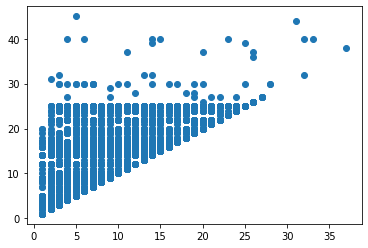

In [44]:
plt.scatter(train_data['Floor'], train_data['HouseFloor'])

HouseYear

In [45]:
train_data.loc[(train_data['HouseYear'] > 2020), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [46]:
train_data_HouseYear_mean = train_data.loc[(train_data['HouseYear'] <= 2020), 'HouseYear'].mean()
train_data.loc[(train_data['HouseYear'] > 2020), 'HouseYear'] = train_data_HouseYear_mean

Ecology_1, Ecology_2, Ecology_3

In [47]:
train_data['Ecology_2'].value_counts() 

B    9870
A      97
Name: Ecology_2, dtype: int64

In [48]:
train_data['Ecology_3'].value_counts()

B    9693
A     274
Name: Ecology_3, dtype: int64

In [49]:
train_data['Ecology_2'] = (train_data['Ecology_2'] == 'B').astype(int)
test_data['Ecology_2'] = (test_data['Ecology_2'] == 'B').astype(int)

train_data['Ecology_3'] = (train_data['Ecology_3'] == 'B').astype(int)
test_data['Ecology_3'] = (test_data['Ecology_3'] == 'B').astype(int)

Social_1, Social_2, Social_3

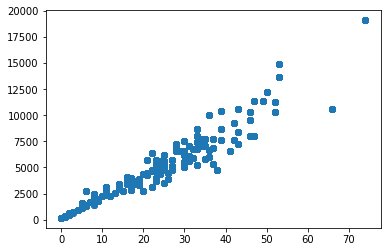

In [50]:
plt.scatter(train_data['Social_1'], train_data['Social_2'])

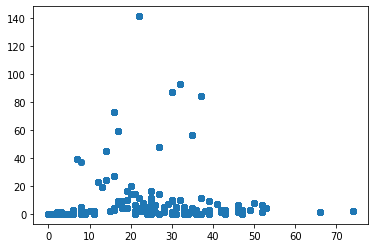

In [51]:
plt.scatter(train_data['Social_1'], train_data['Social_3'])

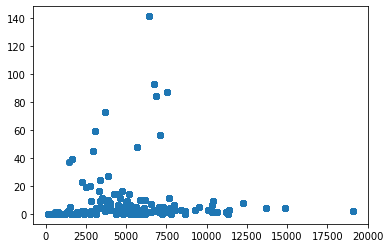

In [52]:
plt.scatter(train_data['Social_2'], train_data['Social_3'])

In [53]:
train_data.loc[(train_data['Social_1'] > train_data['Social_1'].quantile(.90)), 'Social_1'] = train_data.loc[:, 'Social_1'].mean()
train_data.loc[(train_data['Social_2'] > train_data['Social_2'].quantile(.90)), 'Social_2'] = train_data.loc[:, 'Social_2'].mean()
train_data.loc[(train_data['Social_3'] > train_data['Social_3'].quantile(.90)), 'Social_3'] = train_data.loc[:, 'Social_3'].mean()

test_data.loc[(test_data['Social_1'] > test_data['Social_1'].quantile(.90)), 'Social_1'] = test_data.loc[:, 'Social_1'].mean()
test_data.loc[(test_data['Social_2'] > test_data['Social_2'].quantile(.90)), 'Social_2'] = test_data.loc[:, 'Social_2'].mean()
test_data.loc[(test_data['Social_3'] > test_data['Social_3'].quantile(.90)), 'Social_3'] = test_data.loc[:, 'Social_3'].mean()

Healthcare_1, Helthcare_2

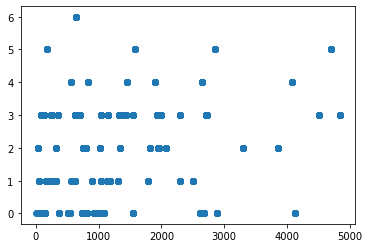

In [54]:
plt.scatter(train_data['Healthcare_1'], train_data['Helthcare_2'])

In [55]:
train_data_Healthcare_1_mean = train_data.loc[train_data['Healthcare_1'].notnull(), 'Healthcare_1'].mean(axis=0)
train_data.loc[train_data['Healthcare_1'].isnull(), 'Healthcare_1'] = train_data_Healthcare_1_mean

test_data_Healthcare_1_mean = test_data.loc[test_data['Healthcare_1'].notnull(), 'Healthcare_1'].mean(axis=0)
test_data.loc[test_data['Healthcare_1'].isnull(), 'Healthcare_1'] = test_data_Healthcare_1_mean

In [56]:
##########до этого было 0.72604
#train_data.loc[train_data['Healthcare_1'] > train_data['Healthcare_1'].quantile(.95), 'Healthcare_1'] = train_data.loc[:, 'Healthcare_1'].median()
#train_data.loc[train_data['Helthcare_2'] > train_data['Helthcare_2'].quantile(.95), 'Helthcare_2'] = train_data.loc[:, 'Helthcare_2'].median()

#test_data.loc[test_data['Healthcare_1'] > test_data['Healthcare_1'].quantile(.95), 'Healthcare_1'] = test_data.loc[:, 'Healthcare_1'].median()
#test_data.loc[test_data['Helthcare_2'] > test_data['Helthcare_2'].quantile(.95), 'Helthcare_2'] = test_data.loc[:, 'Helthcare_2'].median()

In [57]:
train_data['Helthcare_2'].mean()

1.3189525433931975

Shops_1, Shops_2

In [58]:
train_data['Shops_2'].value_counts()

B    9142
A     825
Name: Shops_2, dtype: int64

In [59]:
train_data['Shops_2'] = (train_data['Shops_2'] == 'B').astype(int)
test_data['Shops_2'] = (test_data['Shops_2'] == 'B').astype(int)
train_data['Shops_2'].value_counts()

1    9142
0     825
Name: Shops_2, dtype: int64

Ecology_1 Ecology_2 Ecology_3

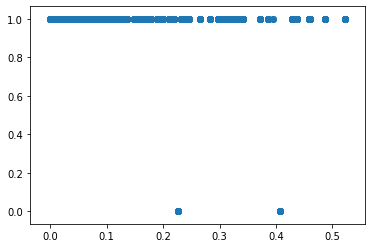

In [60]:
plt.scatter(train_data['Ecology_1'], train_data['Ecology_2'])

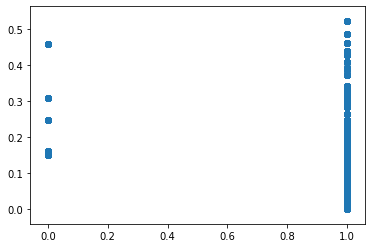

In [61]:
plt.scatter(train_data['Ecology_3'], train_data['Ecology_1'])

Price

In [62]:
train_data_result = train_data['Price']
train_data_with_price = train_data.loc[:][:]
train_data = train_data.drop(['Price'], axis=1)

Заключение

In [63]:
train_data.info()
train_data.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9967 entries, 0 to 9999
Data columns (total 18 columns):
DistrictId       9967 non-null int64
Rooms            9967 non-null float64
Square           9967 non-null float64
LifeSquare       9967 non-null float64
KitchenSquare    9967 non-null float64
Floor            9967 non-null int64
HouseFloor       9967 non-null float64
HouseYear        9967 non-null float64
Ecology_1        9967 non-null float64
Ecology_2        9967 non-null int32
Ecology_3        9967 non-null int32
Social_1         9967 non-null float64
Social_2         9967 non-null float64
Social_3         9967 non-null float64
Healthcare_1     9967 non-null float64
Helthcare_2      9967 non-null int64
Shops_1          9967 non-null int64
Shops_2          9967 non-null int32
dtypes: float64(11), int32(3), int64(4)
memory usage: 1.3 MB


,count,mean,std,min,25%,50%,75%,max
DistrictId,9967.0,50.447577,43.619352,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,9967.0,1.888331,0.810992,1.000000,1.000000,2.000000,2.000000,5.000000
Square,9967.0,56.252106,18.894316,15.988889,41.872804,52.619125,65.980405,201.627361
LifeSquare,9967.0,35.905732,14.484914,10.040786,24.862556,33.102536,43.988902,161.504222
KitchenSquare,9967.0,8.508707,5.544690,5.000000,6.000000,7.000000,9.000000,123.000000
Floor,9967.0,8.517508,5.220626,1.000000,4.000000,7.000000,12.000000,37.000000
HouseFloor,9967.0,13.398214,5.842200,1.000000,9.000000,14.000000,17.000000,45.000000
HouseYear,9967.0,1984.837431,18.404410,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,9967.0,0.118899,0.119126,0.000000,0.017647,0.075424,0.195781,0.521867
Ecology_2,9967.0,0.990268,0.098175,0.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
test_data.info()
test_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int32
dtypes: float64(10), int32(3), int64(5)
memory usage: 644.7 KB


,count,mean,std,min,25%,50%,75%,max
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.591223,19.407324,1.378543,41.989020,52.933734,66.416189,303.071094
LifeSquare,5000.0,36.109966,14.451735,0.858815,25.021414,33.425631,44.259005,189.420545
KitchenSquare,5000.0,8.404583,5.207386,5.000000,6.000000,7.000000,9.000000,112.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,13.395000,6.231945,1.000000,9.000000,14.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Ecology_2,5000.0,0.990400,0.097518,0.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
train_data_result.head()

0    184966.930730
1    300009.450063
2    220925.908524
3    175616.227217
4    150226.531644
Name: Price, dtype: float64

# Разобьем на выборки и сделаем scale

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_result, test_size=0.25, random_state=24)

In [68]:
model_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(model_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(model_scaler.transform(X_test), columns=X_test.columns)
test_data_scaled = pd.DataFrame(model_scaler.transform(test_data), columns=test_data.columns)

In [69]:
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
5517,27,1.0,48.175959,20.282928,16.0,2,14.0,2011.0,0.051815,1,1,5.0,1227.000000,0.0,1142.218129,0,0,1
1624,90,1.0,31.552775,20.074135,5.0,6,6.0,1966.0,0.265089,1,1,37.0,5288.000000,0.0,1937.000000,3,2,1
7661,9,3.0,86.394763,49.185121,11.0,10,14.0,1997.0,0.161532,1,1,25.0,5648.000000,1.0,30.000000,2,4,1
6867,93,2.0,45.073458,27.988971,6.0,1,9.0,1980.0,0.050900,1,1,43.0,5353.858332,1.0,30.000000,2,3,1
5516,47,2.0,63.667916,35.294284,12.0,16,16.0,2007.0,0.197368,1,1,8.0,2423.000000,1.0,32.000000,0,1,1


In [70]:
test_data_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.176427,0.136709,-0.335304,-0.166040,-0.449359,-0.476365,0.111942,-0.692358,1.619236,0.104665,0.168763,-0.771108,-0.643226,-0.613057,0.013723,-0.881070,-0.873808,0.299416
1,0.544960,0.136709,0.695356,0.508201,-0.449359,-0.476365,-1.255323,-0.420874,-0.362201,0.104665,0.168763,-1.133390,-1.110254,0.034616,0.013723,-0.881070,-0.457298,0.299416
2,3.216823,-1.101957,-2.139940,-1.796406,0.626649,-1.243661,-1.426231,-4.113044,-1.002721,0.104665,0.168763,0.605561,1.063151,1.738836,4.891936,2.477420,0.167468,0.299416
3,-0.076939,0.136709,0.896559,1.118151,0.088645,2.592819,1.479207,1.208024,-0.141644,0.104665,0.168763,0.098367,0.010469,0.034616,0.013723,1.134024,-0.249043,0.299416
4,-0.537605,-1.101957,-0.460572,0.524678,-0.449359,1.633699,0.624666,1.750990,-0.392809,0.104665,0.168763,-1.423215,-1.398094,-0.613057,0.013723,-0.881070,-0.873808,-3.339831


# Корреляция

In [71]:
corr = train_data_with_price.corr()
corr

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
DistrictId,1.000000,0.075253,-0.031520,-0.056899,-0.053815,-0.121218,-0.208495,-0.201297,0.065400,-0.093388,-0.027297,0.300020,0.290442,0.422314,0.238428,0.306556,0.174186,-0.020718,0.265866
Rooms,0.075253,1.000000,0.764557,0.708125,0.106284,-0.006470,-0.039916,-0.044993,-0.030837,-0.002309,-0.004235,0.069263,0.073211,0.081041,0.030502,0.063641,0.053337,-0.000955,0.574257
Square,-0.031520,0.764557,1.000000,0.880868,0.288794,0.118973,0.134667,0.191399,-0.072525,0.033076,0.031826,-0.121894,-0.098236,-0.018354,-0.033696,-0.036549,0.009395,-0.057821,0.583346
LifeSquare,-0.056899,0.708125,0.880868,1.000000,0.193085,0.093797,0.079453,0.155412,-0.062251,0.028465,0.040809,-0.156588,-0.134226,-0.032131,-0.039238,-0.063876,-0.007296,-0.056150,0.479836
KitchenSquare,-0.053815,0.106284,0.288794,0.193085,1.000000,0.097126,0.111266,0.151148,-0.016323,0.030194,0.025829,-0.144763,-0.132408,-0.083252,-0.025835,-0.084566,-0.078156,-0.120029,0.123356
Floor,-0.121218,-0.006470,0.118973,0.093797,0.097126,1.000000,0.601680,0.284179,-0.014301,0.049765,0.026071,-0.084886,-0.065341,-0.067111,-0.098356,-0.066979,0.022204,-0.014233,0.126643
HouseFloor,-0.208495,-0.039916,0.134667,0.079453,0.111266,0.601680,1.000000,0.467643,-0.023680,0.078135,0.029842,-0.128508,-0.104733,-0.133605,-0.140326,-0.120737,0.010234,0.000594,0.113121
HouseYear,-0.201297,-0.044993,0.191399,0.155412,0.151148,0.284179,0.467643,1.000000,-0.066386,0.076816,0.047961,-0.148423,-0.113801,-0.195554,-0.151295,-0.117043,-0.002292,-0.059419,0.036370
Ecology_1,0.065400,-0.030837,-0.072525,-0.062251,-0.016323,-0.014301,-0.023680,-0.066386,1.000000,-0.110782,-0.223503,0.084194,0.128848,0.161234,-0.033705,0.031048,-0.076024,0.079989,-0.058201
Ecology_2,-0.093388,-0.002309,0.033076,0.028465,0.030194,0.049765,0.078135,0.076816,-0.110782,1.000000,-0.016668,-0.105746,-0.046841,-0.099422,-0.031741,-0.082871,0.051981,0.022147,0.022331


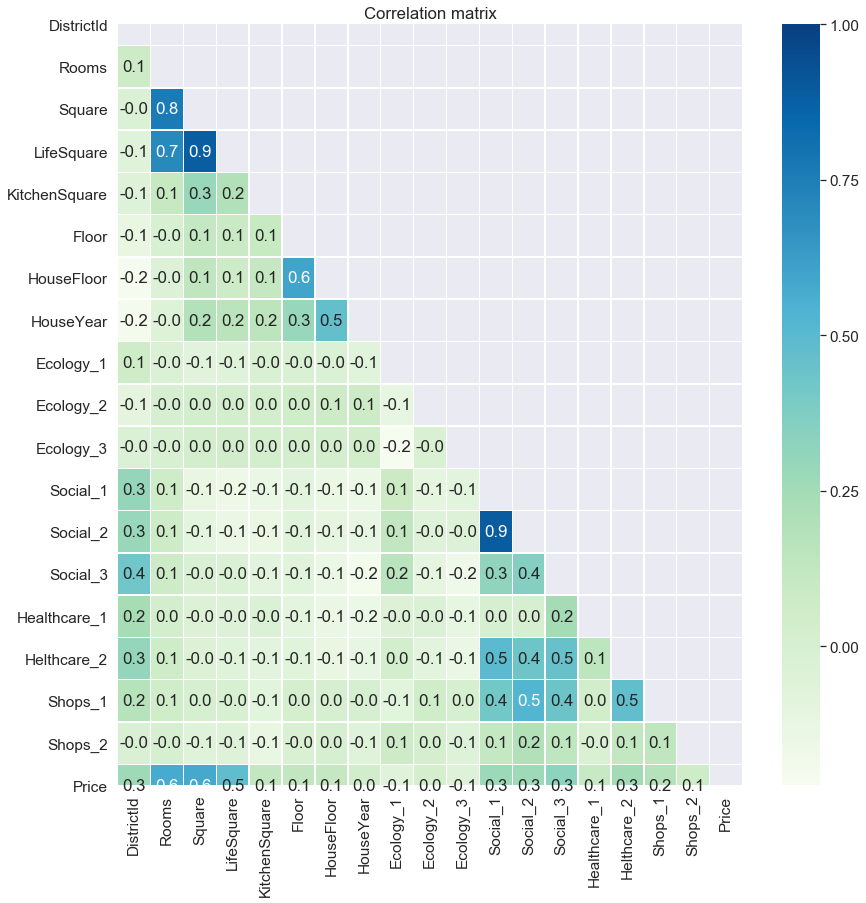

In [72]:
import seaborn as sns
plt.figure(figsize = (14, 14))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show();

In [73]:
corr = corr.loc[corr.index=='Price',  corr.columns != 'Price']
corr

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Price,0.265866,0.574257,0.583346,0.479836,0.123356,0.126643,0.113121,0.03637,-0.058201,0.022331,-0.05144,0.277101,0.272432,0.321533,0.104166,0.252704,0.180861,0.070259


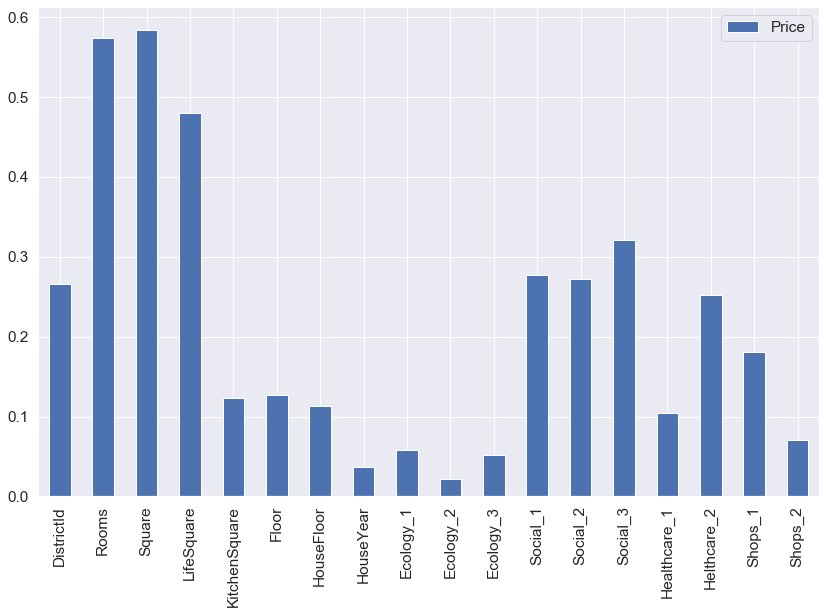

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9
corr.T.abs().plot(kind='bar')
plt.show()

In [75]:
corr = corr.T.abs()
corr = corr.sort_values('Price', ascending=False)
index_corr = corr.index
index_corr

Index(['Square', 'Rooms', 'LifeSquare', 'Social_3', 'Social_1', 'Social_2',
       'DistrictId', 'Helthcare_2', 'Shops_1', 'Floor', 'KitchenSquare',
       'HouseFloor', 'Healthcare_1', 'Shops_2', 'Ecology_1', 'Ecology_3',
       'HouseYear', 'Ecology_2'],
      dtype='object')

# Моделируем

In [76]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

RandomForestRegressor

In [77]:
index = X_train_scaled.columns

In [78]:
model_RFR = RandomForestRegressor(n_estimators=1000, max_depth=24, random_state=24)
model_RFR.fit(X_train, y_train)
y_pred_RFR_train = model_RFR.predict(X_train)
y_pred_RFR = model_RFR.predict(X_test)
print('train ', r2_score(y_train, y_pred_RFR_train.flatten()))
print('test ', r2_score(y_test, y_pred_RFR.flatten()))

train  0.9619159799642969
test  0.755566102567076


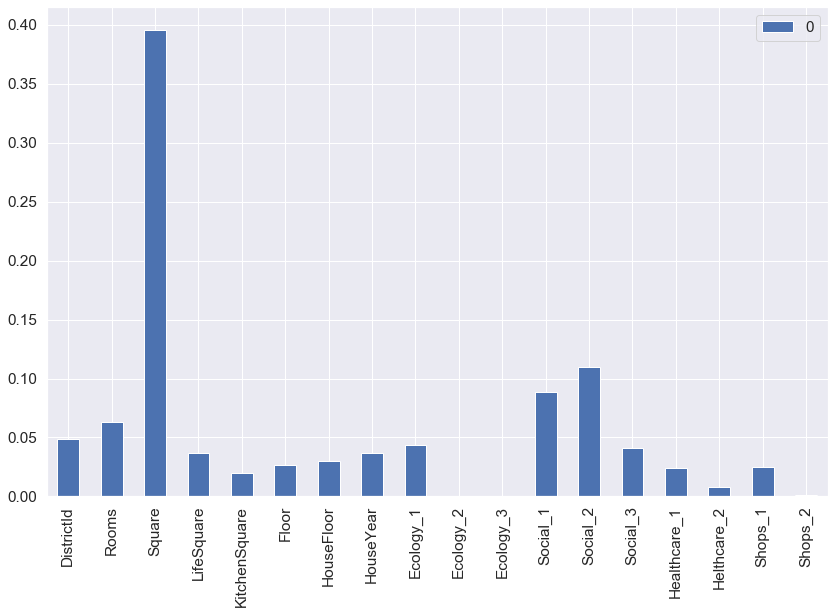

In [79]:
feature_importances = pd.DataFrame(columns=X_train_scaled.columns)
feature_importances.loc[0] = model_RFR.feature_importances_
feature_importances.T.abs().plot(kind='bar')
plt.show()

Уберем признаки с высокой корреляцией друг к другу

# Готовим результат

In [80]:
test_data_id = pd.DataFrame({'Id': test_data_id})

In [81]:
result = pd.DataFrame(model_RFR.predict(test_data), columns=['Price'])
result.head(10)

,Price
0,165064.722373
1,223457.800599
2,157671.934384
3,332829.235565
4,143300.995042
5,215193.350885
6,167989.606067
7,222857.646892
8,298012.739440
9,213024.893264


In [82]:
result[test_data_id.columns] = test_data_id
result = result[['Id', 'Price']]
result.head(10)

,Id,Price
0,725,165064.722373
1,15856,223457.800599
2,5480,157671.934384
3,15664,332829.235565
4,14275,143300.995042
5,7633,215193.350885
6,13329,167989.606067
7,5502,222857.646892
8,4220,298012.739440
9,11538,213024.893264


In [83]:
result.to_csv('result.csv', index=False, encoding='utf-8', header=True)